# Introduction

In [ ]:
"""
What? Demonstration of k-means assumptions

This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected
clusters.

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
"""

# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import rcParams

# Create synthetic dataset

In [ ]:
"""
We can clearly distinguish 3 clusters
"""

In [11]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

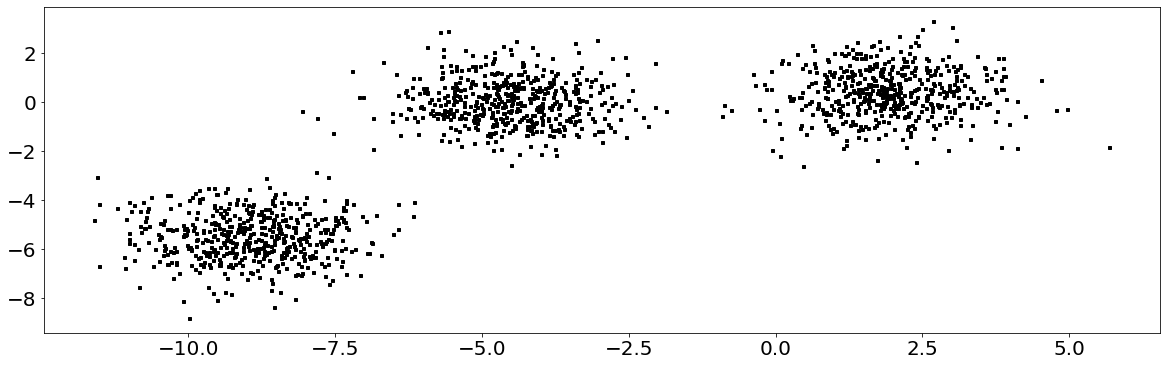

In [25]:
plt.figure()
plt.clf()
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 16, 6
plt.plot(X[:, 0], X[:, 1], 'ks', ms = 3)  
plt.show()

# Incorrect number of clusters

In [ ]:
"""
We purpously feed the wrong number of cluster to see what happens
"""

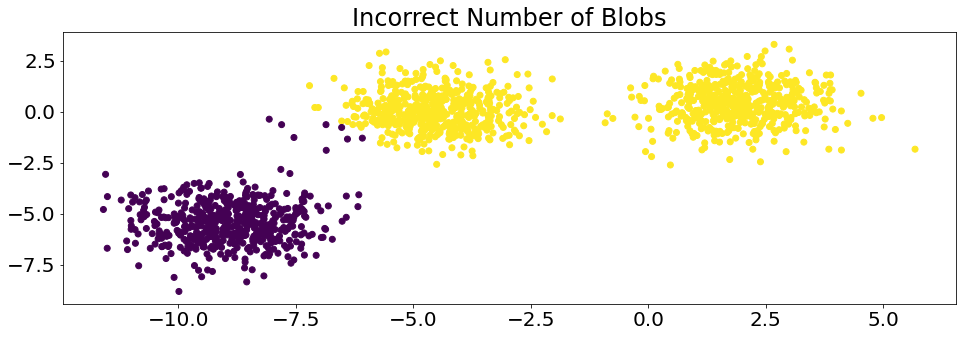

In [29]:
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 16,5
plt.figure()
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

# Anisotropicly distributed data

In [20]:
"""
We purpously sked the data to see what happens
"""

'\nWe purpously sked the data to see what happens\n'

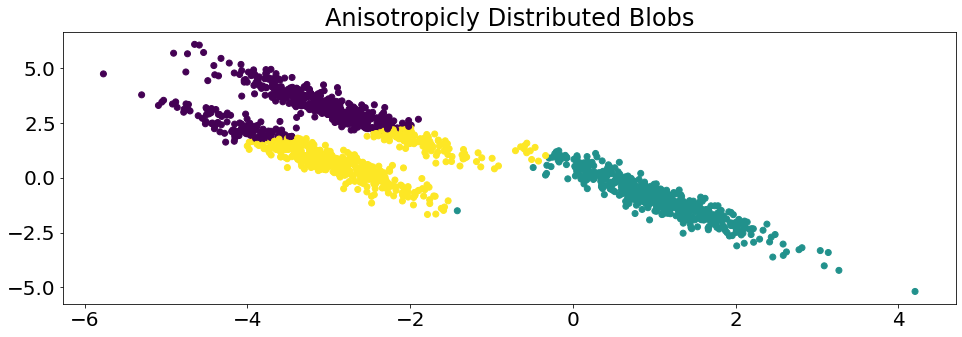

In [28]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

rcParams['font.size'] = 20
rcParams['figure.figsize'] = 16,5
plt.figure()
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")
plt.show()

# Different variance

In [ ]:
"""
We purpusly change the variance
"""

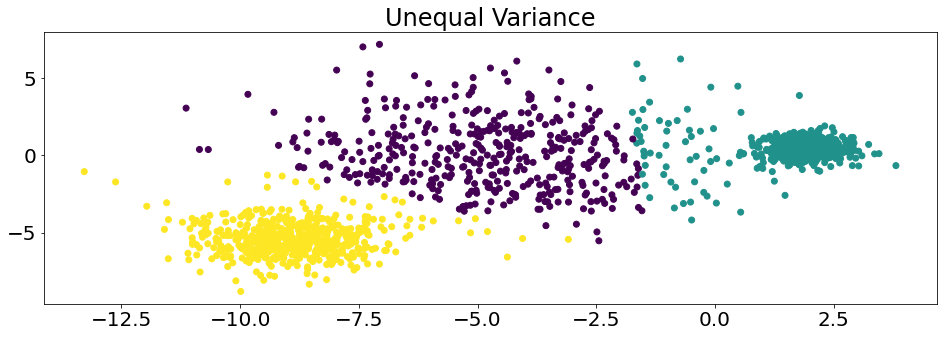

In [31]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

rcParams['font.size'] = 20
rcParams['figure.figsize'] = 16,5
plt.figure()
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

plt.show()

# Unevenly sized blobs

In [ ]:
"""
We purpously change the sizde of each original blob
"""

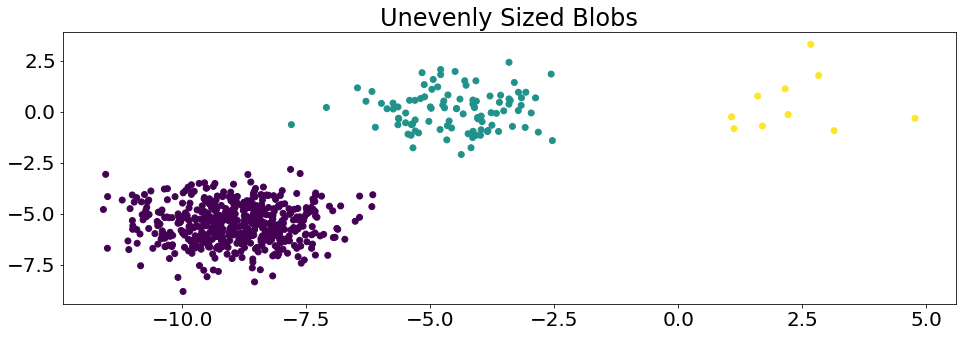

In [32]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

rcParams['font.size'] = 20
rcParams['figure.figsize'] = 16,5
plt.figure()
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")
plt.show()